<a href="https://colab.research.google.com/github/JohnYoon41/Man/blob/main/XGBoostpractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import data 

In [1]:
import pandas as pd

train=pd.read_csv('./train.csv')

test=pd.read_csv('./test.csv')



#EDA

In [2]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#Examining Null Value

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#Drop Columns

In [4]:
train=train.drop(['Name','Ticket','Cabin'],axis=1)
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


#Dataset that is neat

In [5]:
import numpy as np

train=train.dropna()
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,29.1250,Q
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
889,890,1,1,male,26.0,0,0,30.0000,C


#Changing the non-numerical variables into numbers

In [6]:
train['Sex']=train['Sex'].replace('male',789)
train['Sex']=train['Sex'].replace('female',512)

train['Embarked']=train['Embarked'].replace('C',0)
train['Embarked']=train['Embarked'].replace('Q',1)
train['Embarked']=train['Embarked'].replace('S',2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [7]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,789,22.0,1,0,7.2500,2
1,2,1,1,512,38.0,1,0,71.2833,0
2,3,1,3,512,26.0,0,0,7.9250,2
3,4,1,1,512,35.0,1,0,53.1000,2
4,5,0,3,789,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
885,886,0,3,512,39.0,0,5,29.1250,1
886,887,0,2,789,27.0,0,0,13.0000,2
887,888,1,1,512,19.0,0,0,30.0000,2
889,890,1,1,789,26.0,0,0,30.0000,0


In [8]:
train=train.drop(['PassengerId'],axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,789,22.0,1,0,7.2500,2
1,1,1,512,38.0,1,0,71.2833,0
2,1,3,512,26.0,0,0,7.9250,2
3,1,1,512,35.0,1,0,53.1000,2
4,0,3,789,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,512,39.0,0,5,29.1250,1
886,0,2,789,27.0,0,0,13.0000,2
887,1,1,512,19.0,0,0,30.0000,2
889,1,1,789,26.0,0,0,30.0000,0


#Logistic Regression

In [9]:
import statsmodels.api as sm  

sm.Logit(train['Survived'], train.drop(['Survived'],axis=1)).fit().summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.581969
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:                  0.1376
Time:                        07:24:53   Log-Likelihood:                -414.36
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 4.466e-26
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.2214      0.121      1.836      0.066      -0.015       0.458
Sex           -0.0030      0.001     -5.494      0.000      -0.004      -0.002
Age            0.0032      0.006      0.531      0.596      -0.009       0.015
SibSp         -0.2123      0.106     -1.994      0.046      -0.421      -0.004
Parch          0.0493      0.109      0.451      0.652      -0.165       0.263
Fare           0.0240      0.004      6.367      0.000       0.017       0.031
Embarked       0.1691      0.115      1.474      0.140      -0.056       0.394
==============================================================================
"""

In [10]:
for x in train:
 print(sm.Logit(train['Survived'], train[x]).fit().summary())

         Current function value: 0.412773
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      711
Method:                           MLE   Df Model:                            0
Date:                Sat, 14 Aug 2021   Pseudo R-squ.:                  0.3883
Time:                        07:24:53   Log-Likelihood:                -293.89
converged:                      False   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Survived      35.2781    2.8e+06   1.26e-05      1.000   -5.48e+06    5.48e+06

Possibly complete quasi-separation: A fraction 0.40 of observati

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
test 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [12]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,789,22.0,1,0,7.2500,2
1,1,1,512,38.0,1,0,71.2833,0
2,1,3,512,26.0,0,0,7.9250,2
3,1,1,512,35.0,1,0,53.1000,2
4,0,3,789,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,512,39.0,0,5,29.1250,1
886,0,2,789,27.0,0,0,13.0000,2
887,1,1,512,19.0,0,0,30.0000,2
889,1,1,789,26.0,0,0,30.0000,0


# drop Parch

In [13]:
train=train.drop(['Parch'],axis=1)
train

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,789,22.0,1,7.2500,2
1,1,1,512,38.0,1,71.2833,0
2,1,3,512,26.0,0,7.9250,2
3,1,1,512,35.0,1,53.1000,2
4,0,3,789,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
885,0,3,512,39.0,0,29.1250,1
886,0,2,789,27.0,0,13.0000,2
887,1,1,512,19.0,0,30.0000,2
889,1,1,789,26.0,0,30.0000,0


In [14]:
test=test.drop(['Name','Parch','Ticket','Cabin'],axis=1)
test

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Embarked
0,892,3,male,34.5,0,7.8292,Q
1,893,3,female,47.0,1,7.0000,S
2,894,2,male,62.0,0,9.6875,Q
3,895,3,male,27.0,0,8.6625,S
4,896,3,female,22.0,1,12.2875,S
...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,8.0500,S
414,1306,1,female,39.0,0,108.9000,C
415,1307,3,male,38.5,0,7.2500,S
416,1308,3,male,NaN,0,8.0500,S


In [15]:
submission_number=test['PassengerId']
submission_number

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [16]:
test=test.drop(['PassengerId'],axis=1)
test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.5,0,7.8292,Q
1,3,female,47.0,1,7.0000,S
2,2,male,62.0,0,9.6875,Q
3,3,male,27.0,0,8.6625,S
4,3,female,22.0,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,NaN,0,8.0500,S
414,1,female,39.0,0,108.9000,C
415,3,male,38.5,0,7.2500,S
416,3,male,NaN,0,8.0500,S


# Imputed by mean value

In [17]:
test['Age']=test['Age'].fillna(test['Age'].mean())
test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.50000,0,7.8292,Q
1,3,female,47.00000,1,7.0000,S
2,2,male,62.00000,0,9.6875,Q
3,3,male,27.00000,0,8.6625,S
4,3,female,22.00000,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,30.27259,0,8.0500,S
414,1,female,39.00000,0,108.9000,C
415,3,male,38.50000,0,7.2500,S
416,3,male,30.27259,0,8.0500,S


In [18]:
test['Fare']=test['Fare'].fillna(test['Fare'].mean())
test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,male,34.50000,0,7.8292,Q
1,3,female,47.00000,1,7.0000,S
2,2,male,62.00000,0,9.6875,Q
3,3,male,27.00000,0,8.6625,S
4,3,female,22.00000,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,30.27259,0,8.0500,S
414,1,female,39.00000,0,108.9000,C
415,3,male,38.50000,0,7.2500,S
416,3,male,30.27259,0,8.0500,S


In [19]:
test['Sex']=test['Sex'].replace('male',789)
test['Sex']=test['Sex'].replace('female',512)
test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,789,34.50000,0,7.8292,Q
1,3,512,47.00000,1,7.0000,S
2,2,789,62.00000,0,9.6875,Q
3,3,789,27.00000,0,8.6625,S
4,3,512,22.00000,1,12.2875,S
...,...,...,...,...,...,...
413,3,789,30.27259,0,8.0500,S
414,1,512,39.00000,0,108.9000,C
415,3,789,38.50000,0,7.2500,S
416,3,789,30.27259,0,8.0500,S


In [20]:
test['Embarked']=test['Embarked'].replace('C',0)
test['Embarked']=test['Embarked'].replace('Q',1)
test['Embarked']=test['Embarked'].replace('S',2)
test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,789,34.50000,0,7.8292,1
1,3,512,47.00000,1,7.0000,2
2,2,789,62.00000,0,9.6875,1
3,3,789,27.00000,0,8.6625,2
4,3,512,22.00000,1,12.2875,2
...,...,...,...,...,...,...
413,3,789,30.27259,0,8.0500,2
414,1,512,39.00000,0,108.9000,0
415,3,789,38.50000,0,7.2500,2
416,3,789,30.27259,0,8.0500,2


In [21]:
phone_model=sm.Logit(train['Survived'], train.drop(['Survived'],axis=1)).fit() 
phone_model

Optimization terminated successfully.
         Current function value: 0.582112
         Iterations 6


In [22]:
phone_model.predict(test)

0      0.229036
1      0.405943
2      0.211033
3      0.260278
4      0.418131
         ...   
413    0.259386
414    0.813214
415    0.260631
416    0.259386
417    0.223501
Length: 418, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


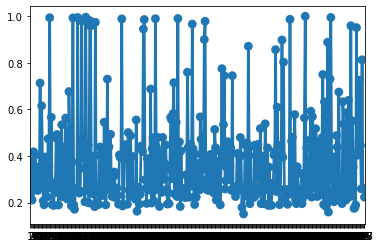

In [23]:
import seaborn as sns
import numpy as np
sns.pointplot(np.arange(1,419),phone_model.predict(test))

In [24]:
result = phone_model.predict(test)
result

0      0.229036
1      0.405943
2      0.211033
3      0.260278
4      0.418131
         ...   
413    0.259386
414    0.813214
415    0.260631
416    0.259386
417    0.223501
Length: 418, dtype: float64

In [25]:
result.mean()


0.37498135990483145

In [26]:
result.median()

0.2757960331296362

# Thresholds = 0.3,0.4,0.5,& 0.6

In [27]:
result03=pd.DataFrame()
result04=pd.DataFrame()
result05=pd.DataFrame()
result06=pd.DataFrame()
for x in result:
  if x >= 0.3:
    x = 1
    result03=result03.append([x])
  else:
    x = 0 
    result03=result03.append([x])
result03



,0
0,0
0,1
0,0
0,0
0,1
...,...
0,0
0,1
0,0
0,0


In [28]:
for x in result:
  if x >= 0.4:
    x = 1
    result04=result04.append([x])
  else:
    x = 0 
    result04=result04.append([x])
result04

,0
0,0
0,1
0,0
0,0
0,1
...,...
0,0
0,1
0,0
0,0


In [29]:
for x in result:
  if x >= 0.5:
    x = 1
    result05=result05.append([x])
  else:
    x = 0 
    result05=result05.append([x])
result05

,0
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,1
0,0
0,0


In [30]:
for x in result:
  if x >= 0.6:
    x = 1
    result06=result06.append([x])
  else:
    x = 0 
    result06=result06 .append([x])
result06

,0
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,1
0,0
0,0


In [31]:
result03=result03.reset_index().drop(['index'],axis=1)
result04=result04.reset_index().drop(['index'],axis=1)
result05=result05.reset_index().drop(['index'],axis=1)
result06=result06.reset_index().drop(['index'],axis=1)

In [32]:
result03

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [33]:
result04

,0
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [34]:
result05

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [35]:
result06

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [36]:
result03.columns=['Survived']
result04.columns=['Survived']
result05.columns=['Survived']
result06.columns=['Survived']

In [37]:
result03


,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [38]:
submission03=pd.concat([submission_number,result03],axis=1)
submission04=pd.concat([submission_number,result04],axis=1)
submission05=pd.concat([submission_number,result05],axis=1)
submission06=pd.concat([submission_number,result06],axis=1)

In [39]:
submission03

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [40]:
submission03.to_csv('./result03.csv',index=False)
submission04.to_csv('./result04.csv',index=False)
submission05.to_csv('./result05.csv',index=False)
submission06.to_csv('./result06.csv',index=False)

In [41]:
train

,Survived,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0,3,789,22.0,1,7.2500,2
1,1,1,512,38.0,1,71.2833,0
2,1,3,512,26.0,0,7.9250,2
3,1,1,512,35.0,1,53.1000,2
4,0,3,789,35.0,0,8.0500,2
...,...,...,...,...,...,...,...
885,0,3,512,39.0,0,29.1250,1
886,0,2,789,27.0,0,13.0000,2
887,1,1,512,19.0,0,30.0000,2
889,1,1,789,26.0,0,30.0000,0


In [42]:
test

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,3,789,34.50000,0,7.8292,1
1,3,512,47.00000,1,7.0000,2
2,2,789,62.00000,0,9.6875,1
3,3,789,27.00000,0,8.6625,2
4,3,512,22.00000,1,12.2875,2
...,...,...,...,...,...,...
413,3,789,30.27259,0,8.0500,2
414,1,512,39.00000,0,108.9000,0
415,3,789,38.50000,0,7.2500,2
416,3,789,30.27259,0,8.0500,2


In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
yid=RandomForestClassifier(verbose=1)
yid.fit(train.drop(['Survived'], axis=1), train['Survived'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [45]:
 yid.predict(test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
result=yid.predict(test)
result

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [47]:
result=pd.DataFrame(result)
result

,0
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [48]:
result.columns=['Survived']
result

,Survived
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [49]:
pd.concat([submission_number,result],axis=1).to_csv('./submission_rf.csv',index=False)

In [50]:
result

,Survived
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [51]:
yid.feature_importances_


array([0.09690149, 0.26264451, 0.30500771, 0.04404593, 0.26446968,
       0.02693069])

In [52]:
import xgboost
xgb=xgboost.XGBClassifier().fit(train.drop(['Survived'],axis=1),train['Survived'])
xgb.predict(test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [55]:
xgb.predict(test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [56]:
resultsXGB=xgb.predict(test)

In [57]:
resultsXGB

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [58]:
resultsXGB=pd.DataFrame(resultsXGB)

In [59]:
resultsXGB

,0
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [60]:
resultsXGB.columns=['Survived']

In [61]:
resultsXGB

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [62]:
pd.concat([submission_number,pd.concat([submission_number,result],axis=1).to_csv('./submission_rf.csv',index=False)],axis=1).to_csv('./submission_rf.csv',index=False)

In [64]:
resultsXGB

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [65]:
submission06

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
resultsXGB=pd.concat([submission_number,resultsXGB],axis=1)

In [69]:
resultsXGB.to_csv('./resultsXGB.csv',index=False ,encoding='utf-8-sig')